In [2]:
import dlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
import mediapipe as mp
import numpy as np
import os
import glob
import imutils
from imutils import face_utils
from playsound import playsound
import time
%matplotlib inline

In [2]:
sound1 = u"./Trombone.mp3"
sound2 = u"./Bot.mp3"
sound3 = u"./Alright.mp3"

### Head Pose Estimation

In [3]:
#to get a mesh of the face that will be later used for pose estimation
mp_f_mesh = mp.solutions.face_mesh

In [4]:
face_mesh = mp_f_mesh.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5)

In [5]:
cap = cv2.VideoCapture(0)

In [6]:
def cameraMat(fl,f2, center):
    mat = [[fl, 1, center[0]],
                    [0, f2, center[1]],
                    [0, 0, 1]]
    return np.array(mat, dtype=np.float64)

In [7]:
#while video mode of the camera is open
while cap.isOpened():
    #take images of each frame
    success, image = cap.read()
    cv2.circle(image, (120, 50), 20, (0, 0, 255), 40)
    cv2.circle(image, (540, 50), 20, (0, 255, 0), 40)
    cv2.circle(image, (120, 300), 20, (255, 0, 0), 40)
    start = time.time()
    
    #Converting to BGR because that is what mediapipe uses
    image = cv2.cvtColor(cv2.flip(image,1), cv2.COLOR_BGR2RGB)
    
    image.flags.writeable = False
    
    #get the mesh. Runs a face detector. Mediapipe offers this detector that can create a mesh of 498 facial landmarks
    results = face_mesh.process(image)
    
    image.flags.writeable = True
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    #store image
    img_h, img_w, img_ch = image.shape
    
    #face in world coordinate
    
    #face in image plane
    face_2d = []

    face_3d = []
    
    #Getting calibrated camera matrices. Ideally, this should have worked but this did not give good results. 
    #Hence, commonly supported estimations were used instead 
    mtx = np.load('Front_Camera_mtx.npy')
    dist = np.load('Front_Camera_dist.npy')
    
    
    #using estimated focal length
    fx = img_w*1
    fy = img_w*1.0001 
    
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for idx, lm in enumerate(face_landmarks.landmark):
                if idx == 33 or idx == 263 or idx ==1 or idx == 61 or idx == 291 or idx ==199: 
                    if idx == 1:
                        nose_2d = (lm.x * img_w, lm.y * img_h)
                        nose_3d = (lm.x * img_w, lm.y * img_h, lm.z * 3000)
                    x,y = int(lm.x * img_w), int(lm.y * img_h)
                    
                    #getting location of landmarks in image plane
                    face_2d.append([x,y])
                    
                    #estimating corresponding landmarks in 3D space
                    face_3d.append([x,y,lm.z])
            face_2d = np.array(face_2d, dtype=np.float64)
            face_3d = np.array(face_3d, dtype=np.float64)
            
            #setting up camera calibration and distortion matrix
            c_mtx = cameraMat(fx, fy,[img_h/2,img_w/2])
            dist_mat = np.zeros((4,1), dtype=np.float64)
            
            #Performing PnPRansac for getting the rotation and translation vector of the camera. 
            succ ,rvec, tvec,_ = cv2.solvePnPRansac(face_3d, face_2d, c_mtx, dist_mat)
            
            #Converting the rotation vector into rotation matrix 
            rmat, jac = cv2.Rodrigues(rvec)
                
            #getting rotation angles from the rotation vector in order to shift the prjojected points 
            angles, mtxR, _,_,_,_ = cv2.RQDecomp3x3(rmat)
            
            x = angles[0] * 360
            y = angles[1] * 360
            
            #p1 represents the starding point of the projection which is the nose 
            p1 = (int(nose_2d[0]), int(nose_2d[1]))
            #p2 represents the end point of the projection based on the offset created due to change in angle of the head 
            p2 = (int(nose_2d[0] + y * 10), int(nose_2d[1]-x *10))
                
        #creating the virtual projection 
        cv2.line(image, p1, p2, (255,0,0),3)

        #making the buttons interactable when the pointer touches them
        if p2[0]>500 and p2[0]<530 and p2[1]>40 and p2[1]<60 :
#             print('YASS')
            playsound(sound1,False)
    
        if p2[0]>95 and p2[0]<115 and p2[1]>40 and p2[1]<70 :
#             print('YASS')
            
            playsound(sound2,False)
    
        if p2[0]>500 and p2[0]<530 and p2[1]>240 and p2[1]<270 :
#             print('YASS')
            playsound(sound3,False)
                
        cv2.imshow('Head Pose', image)
                
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
    

(-176, 122)
(-173, 101)
(-180, 115)
(-179, 114)
(-179, 89)
(-155, 81)
(-199, 110)
(-208, 116)
(-210, 129)
(-188, 138)
(-178, 137)
(-154, 151)
(-112, 172)
(-64, 188)
(-38, 180)
(-16, 178)
(5, 177)
(21, 180)
(31, 183)
(39, 177)
(43, 175)
(47, 170)
(54, 172)
(61, 172)
(66, 174)
(71, 171)
(77, 171)
(80, 168)
(81, 169)
(82, 166)
(86, 164)
(88, 166)
(88, 165)
(90, 163)
(93, 162)
(97, 158)
(101, 157)
(109, 158)
(115, 152)
(122, 146)
(129, 143)
(136, 137)
(143, 136)
(147, 129)
(150, 129)
(154, 133)
(156, 132)
(158, 127)
(159, 128)
(159, 128)
(162, 129)
(162, 128)
(164, 128)
(162, 129)
(163, 129)
(164, 130)
(166, 131)
(167, 132)
(168, 132)
(169, 133)
(169, 131)
(170, 132)
(171, 132)
(171, 132)
(171, 134)
(172, 132)
(172, 131)
(173, 134)
(123, 136)
(112, 139)
(110, 137)
(101, 137)
(92, 143)
(83, 151)
(78, 150)
(67, 141)
(65, 133)
(64, 128)
(59, 114)
(61, 121)
(42, 94)
(44, 89)
(49, 82)
(52, 73)
(56, 62)
(65, 62)
(71, 57)
(83, 53)
(98, 46)
(162, 37)
(159, 36)
(162, 37)
(158, 40)
(154, 44)
(152, 5

(250, 246)
(254, 239)
(254, 238)
(253, 227)
(253, 223)
(253, 212)
(256, 208)
(253, 202)
(252, 191)
(252, 190)
(250, 193)
(250, 198)
(238, 206)
(229, 204)
(218, 211)
(215, 216)
(206, 226)
(197, 231)
(187, 245)
(183, 256)
(171, 269)
(169, 277)
(161, 289)
(156, 296)
(159, 309)
(161, 311)
(163, 312)
(166, 318)
(169, 316)
(169, 309)
(168, 308)
(168, 309)
(167, 309)
(167, 308)
(170, 307)
(174, 298)
(189, 290)
(225, 273)
(272, 263)
(313, 247)
(358, 242)
(389, 229)
(418, 219)
(438, 216)
(446, 216)
(446, 213)
(448, 211)
(447, 206)
(447, 202)
(444, 202)
(442, 204)
(441, 204)
(436, 202)
(431, 203)
(425, 204)
(406, 203)
(380, 203)
(347, 211)
(286, 214)
(235, 220)
(185, 223)
(131, 218)
(90, 212)
(64, 205)
(47, 196)
(34, 204)
(42, 196)
(33, 198)
(34, 196)
(32, 201)
(33, 197)
(37, 197)
(35, 197)
(41, 196)
(51, 193)
(69, 195)
(100, 194)
(127, 193)
(165, 179)
(198, 166)
(219, 147)
(238, 130)
(249, 122)
(258, 112)
(260, 112)
(262, 114)
(259, 115)
(257, 116)
(255, 118)
(254, 125)
(251, 133)
(247, 128)
(2

(85, 175)
(111, 161)
(125, 135)
(134, 126)
(139, 122)
(148, 102)
(157, 103)
(160, 101)
(165, 100)
(161, 100)
(163, 100)
(161, 101)
(160, 97)
(160, 96)
(157, 92)
(158, 92)
(151, 96)
(155, 95)
(145, 95)
(141, 96)
(138, 104)
(129, 109)
(113, 116)
(103, 126)
(89, 129)
(76, 130)
(65, 140)
(50, 141)
(32, 146)
(13, 146)
(-1, 146)
(-11, 149)
(-21, 152)
(-4, 151)
(8, 154)
(44, 172)
(75, 176)
(113, 176)
(112, 174)
(162, 157)
(183, 170)
(200, 168)
(203, 175)
(211, 189)
(213, 204)
(219, 215)
(227, 215)
(244, 214)
(254, 222)
(259, 228)
(273, 229)
(308, 236)
(321, 241)
(332, 245)
(341, 254)
(354, 264)
(365, 267)
(374, 275)
(384, 283)
(390, 291)
(393, 291)
(393, 285)
(392, 293)
(389, 288)
(365, 297)
(345, 286)
(292, 281)
(231, 287)
(140, 294)
(69, 287)
(9, 257)
(-31, 242)
(-45, 244)
(-68, 219)
(-91, 208)
(-123, 165)
(-129, 152)
(-141, 137)
(-139, 132)
(-150, 125)
(-154, 121)
(-159, 123)
(-160, 113)
(-159, 117)
(-164, 113)
(-157, 106)
(-159, 115)
(-166, 119)
(-159, 116)
(-166, 114)
(-166, 109)
(-171, 

(-94, 99)
(-85, 95)
(-90, 102)
(-81, 95)
(-86, 98)
(-83, 97)
(-86, 99)
(-86, 99)
(-88, 102)
(-83, 97)
(-89, 99)
(-85, 97)
(-93, 95)
(-80, 100)
(-94, 101)
(-88, 99)
(-93, 101)
(-88, 97)
(-94, 100)
(-83, 96)
(-92, 97)
(-91, 98)
(-90, 94)
(-91, 98)
(-89, 101)
(-89, 111)
(-87, 117)
(-97, 119)
(-94, 124)
(-95, 126)
(-92, 124)
(-89, 125)
(-81, 129)
(-78, 125)
(-79, 121)
(-79, 120)
(-82, 118)
(-86, 116)
(-84, 111)
(-83, 107)
(-90, 106)
(-88, 108)
(-85, 110)
(-87, 115)
(-89, 111)
(-94, 114)
(-96, 117)
(-95, 116)
(-91, 113)
(-96, 113)
(-90, 113)
(-86, 114)
(-93, 113)
(-84, 115)
(-85, 115)
(-85, 114)
(-89, 114)
(-86, 115)
(-86, 113)
(-83, 114)
(-80, 113)
(-84, 113)
(-83, 109)
(-83, 112)
(-79, 111)
(-78, 111)
(-87, 114)
(-81, 108)
(-84, 107)
(-79, 111)
(-89, 108)
(-82, 108)
(-85, 105)
(-81, 112)
(-82, 110)
(-88, 109)
(-80, 110)
(-83, 111)
(-82, 115)
(-83, 109)
(-88, 106)
(-84, 107)
(-80, 110)
(-84, 110)
(-88, 108)
(-88, 109)
(-86, 110)
(-88, 110)
(-92, 108)
(-79, 115)
(-85, 111)
(-91, 108)
(-92, 

(238, 105)
(239, 105)
(239, 104)
(240, 106)
(240, 107)
(241, 107)
(241, 106)
(239, 107)
(240, 106)
(241, 105)
(242, 108)
(241, 107)
(240, 106)
(240, 106)
(240, 105)
(242, 107)
(242, 105)
(242, 101)
(242, 102)
(243, 99)
(243, 101)
(244, 99)
(243, 99)
(243, 99)
(245, 100)
(244, 99)
(243, 99)
(245, 99)
(242, 100)
(242, 99)
(241, 99)
(242, 100)
(242, 101)
(246, 102)
(246, 105)
(249, 110)
(247, 109)
(251, 110)
(255, 115)
(255, 113)
(258, 117)
(258, 114)
(262, 114)
(263, 115)
(270, 117)
(275, 120)
(277, 119)
(283, 115)
(287, 113)
(289, 113)
(296, 111)
(297, 110)
(297, 105)
(296, 102)
(295, 102)
(295, 97)
(296, 93)
(298, 91)
(299, 91)
(296, 95)
(294, 95)
(293, 95)
(294, 94)
(288, 87)
(289, 76)
(287, 67)
(288, 65)
(288, 63)
(287, 62)
(289, 61)
(290, 65)
(285, 66)
(285, 72)
(286, 73)
(283, 76)
(283, 77)
(280, 79)
(278, 85)
(280, 90)
(279, 97)
(279, 103)
(278, 107)
(278, 114)
(278, 108)
(281, 93)
(280, 88)
(278, 79)
(276, 79)
(273, 94)
(269, 98)
(269, 102)
(269, 105)
(268, 110)
(267, 112)
(267, 

(207, 118)
(208, 120)
(207, 118)
(208, 120)
(205, 119)
(208, 121)
(209, 121)
(209, 120)
(210, 118)
(210, 119)
(207, 119)
(208, 117)
(210, 120)
(209, 119)
(209, 119)
(209, 118)
(209, 120)
(208, 119)
(210, 117)
(209, 118)
(210, 121)
(209, 121)
(208, 125)
(211, 123)
(212, 126)
(211, 126)
(214, 130)
(214, 128)
(214, 128)
(212, 131)
(214, 128)
(213, 128)
(215, 129)
(214, 129)
(215, 127)
(216, 126)
(217, 123)
(214, 122)
(217, 122)
(214, 121)
(216, 121)
(216, 124)
(215, 123)
(216, 122)
(214, 122)
(215, 122)
(215, 122)
(213, 122)
(216, 121)
(214, 123)
(213, 122)
(215, 121)
(214, 122)
(216, 123)
(216, 122)
(215, 120)
(215, 120)
(215, 117)
(214, 119)
(213, 120)
(212, 118)
(213, 120)
(214, 120)
(215, 118)
(215, 118)
(216, 120)
(216, 118)
(214, 117)
(217, 118)
(220, 119)
(219, 117)
(221, 113)
(222, 117)
(218, 115)
(222, 112)
(225, 110)
(226, 111)
(224, 105)
(230, 107)
(233, 105)
(237, 99)
(242, 89)
(254, 88)
(260, 78)
(262, 78)
(263, 75)
(263, 79)
(263, 89)
(261, 91)
(255, 95)
(250, 97)
(247, 97)


(204, 119)
(214, 116)
(214, 113)
(241, 117)
(266, 109)
(282, 105)
(299, 104)
(312, 104)
(315, 105)
(314, 101)
(316, 103)
(313, 103)
(314, 106)
(313, 104)
(311, 111)
(311, 106)
(310, 100)
(312, 102)
(311, 104)
(312, 104)
(311, 106)
(312, 109)
(312, 109)
(311, 111)
(311, 113)
(311, 113)
(310, 112)
(309, 112)
(310, 114)
(310, 120)
(310, 121)
(310, 123)
(310, 125)
(310, 124)
(309, 123)
(310, 123)
(310, 123)
(311, 117)
(321, 113)
(328, 113)
(376, 86)
(396, 85)
(412, 80)
(422, 84)
(430, 84)
(434, 79)
(433, 75)
(431, 73)
(432, 73)
(430, 76)
(428, 76)
(425, 79)
(424, 79)
(424, 82)
(422, 82)
(422, 83)
(422, 85)
(417, 89)
(415, 96)
(416, 95)
(415, 101)
(413, 104)
(409, 101)
(407, 114)
(398, 121)
(391, 123)
(387, 123)
(388, 119)
(384, 115)
(381, 114)
(382, 115)
(381, 116)
(377, 123)
(373, 125)
(368, 130)
(364, 134)
(364, 128)
(359, 129)
(360, 130)
(354, 129)
(352, 127)
(352, 130)
(352, 128)
(349, 125)
(346, 123)
(346, 122)
(344, 121)
(344, 126)
(338, 135)
(336, 138)
(336, 135)
(335, 136)
(332, 13

(201, 131)
(201, 129)
(200, 129)
(201, 128)
(199, 129)
(200, 128)
(199, 130)
(201, 131)
(200, 131)
(201, 129)
(202, 130)
(200, 130)
(201, 128)
(201, 128)
(201, 129)
(202, 129)
(200, 128)
(201, 127)
(200, 128)
(201, 128)
(202, 127)
(202, 130)
(201, 130)
(201, 130)
(201, 132)
(198, 130)
(198, 129)
(197, 129)
(198, 131)
(196, 131)
(196, 132)
(196, 131)
(196, 132)
(201, 131)
(202, 129)
(200, 129)
(202, 129)
(201, 132)
(201, 133)
(205, 134)
(205, 131)
(202, 132)
(202, 132)
(203, 129)
(203, 131)
(201, 129)
(203, 131)
(203, 131)
(202, 129)
(204, 131)
(203, 131)
(203, 132)
(203, 131)
(204, 131)
(204, 131)
(203, 129)
(202, 129)
(203, 130)
(203, 128)
(203, 129)
(202, 129)
(203, 132)
(202, 126)
(203, 124)
(203, 123)
(205, 123)
(207, 123)
(207, 124)
(211, 122)
(212, 122)
(215, 120)
(214, 120)
(215, 118)
(215, 117)
(219, 117)
(221, 117)
(226, 119)
(228, 120)
(230, 119)
(231, 118)
(230, 121)
(230, 122)
(226, 123)
(223, 126)
(223, 125)
(223, 125)
(223, 124)
(221, 123)
(221, 125)
(222, 126)
(221, 127)

(229, 105)
(227, 110)
(226, 109)
(225, 112)
(223, 113)
(225, 114)
(226, 113)
(225, 113)
(222, 115)
(221, 116)
(221, 113)
(220, 118)
(222, 117)
(222, 118)
(221, 121)
(218, 118)
(219, 116)
(218, 119)
(217, 120)
(219, 118)
(213, 117)
(215, 116)
(213, 116)
(214, 117)
(214, 116)
(214, 115)
(215, 114)
(214, 115)
(213, 114)
(215, 114)
(212, 114)
(213, 112)
(212, 113)
(211, 113)
(210, 112)
(211, 113)
(211, 113)
(211, 113)
(208, 112)
(211, 112)
(209, 113)
(208, 112)
(209, 112)
(210, 111)
(209, 114)
(209, 111)
(209, 112)
(210, 109)
(210, 112)
(208, 114)
(214, 112)
(213, 111)
(212, 110)
(212, 107)
(211, 107)
(211, 109)
(209, 109)
(210, 110)
(210, 111)
(209, 112)
(211, 110)
(211, 110)
(209, 110)
(211, 109)
(209, 110)
(211, 107)
(206, 109)
(212, 106)
(208, 107)
(208, 108)
(207, 106)
(207, 108)
(209, 107)
(205, 108)
(208, 105)
(206, 109)
(207, 106)
(205, 105)
(207, 103)
(206, 102)
(208, 105)
(206, 106)
(208, 106)
(205, 105)
(207, 104)
(207, 103)
(207, 104)
(207, 104)
(207, 104)
(207, 104)
(207, 105)

(260, 124)
(267, 122)
(268, 126)
(276, 125)
(296, 117)
(321, 114)
(345, 111)
(362, 100)
(372, 99)
(376, 99)
(375, 94)
(374, 95)
(368, 101)
(367, 100)
(367, 106)
(362, 109)
(361, 113)
(351, 115)
(340, 118)
(322, 124)
(302, 127)
(278, 132)
(258, 132)
(247, 130)
(240, 130)
(237, 125)
(237, 125)
(241, 130)
(245, 134)
(252, 132)
(256, 129)
(257, 132)
(258, 130)
(256, 132)
(256, 134)
(256, 143)
(259, 143)
(259, 140)
(258, 136)
(257, 131)
(258, 133)
(259, 132)
(260, 135)
(258, 137)
(261, 136)
(262, 136)
(263, 134)
(261, 129)
(263, 124)
(268, 126)
(265, 125)
(266, 123)
(268, 124)
(270, 128)
(268, 127)
(269, 131)
(268, 138)
(272, 135)
(269, 133)
(271, 133)
(270, 129)
(272, 121)
(271, 110)
(274, 112)
(276, 115)
(279, 120)
(278, 133)
(285, 133)
(294, 132)
(294, 144)
(300, 141)
(306, 138)
(309, 134)
(309, 132)
(309, 136)
(309, 141)
(306, 143)
(299, 153)
(300, 149)
(304, 135)
(298, 144)
(296, 135)
(298, 137)
(300, 134)
(299, 134)
(299, 133)
(298, 135)
(301, 146)
(299, 144)
(300, 142)
(308, 131)
(30

(274, 130)
(279, 130)
(277, 126)
(276, 116)
(273, 111)
(273, 104)
(271, 104)
(270, 108)
(271, 109)
(270, 110)
(273, 112)
(267, 112)
(269, 120)
(269, 127)
(269, 132)
(270, 132)
(272, 132)
(269, 131)
(268, 129)
(270, 130)
(267, 125)
(266, 119)
(265, 113)
(264, 115)
(265, 117)
(265, 117)
(266, 123)
(268, 126)
(270, 128)
(269, 126)
(271, 126)
(271, 126)
(272, 125)
(270, 121)
(270, 115)
(266, 111)
(263, 106)
(263, 106)
(264, 104)
(262, 102)
(265, 112)
(270, 116)
(267, 115)
(268, 120)
(268, 127)
(269, 124)
(268, 119)
(270, 117)
(271, 110)
(266, 117)
(270, 113)
(271, 116)
(272, 119)
(273, 119)
(272, 123)
(273, 123)
(271, 122)
(270, 113)
(269, 116)
(269, 118)
(268, 118)
(268, 119)
(269, 112)
(271, 118)
(275, 116)
(273, 116)
(278, 116)
(274, 112)
(277, 113)
(279, 116)
(283, 113)
(292, 125)
(303, 130)
(328, 115)
(335, 103)
(341, 99)
(339, 102)
(341, 97)
(347, 98)
(347, 101)
(340, 108)
(338, 105)
(335, 115)
(335, 106)
(332, 108)
(333, 109)
(330, 110)
(330, 106)
(335, 103)
(335, 102)
(340, 96)
(34

(274, 153)
(276, 146)
(272, 143)
(271, 139)
(269, 130)
(269, 126)
(271, 122)
(270, 124)
(270, 125)
(273, 129)
(277, 134)
(275, 135)
(274, 130)
(277, 135)
(276, 140)
(277, 142)
(278, 147)
(278, 144)
(274, 145)
(273, 136)
(274, 126)
(273, 124)
(271, 122)
(273, 122)
(272, 123)
(273, 124)
(276, 126)
(278, 129)
(286, 129)
(294, 122)
(300, 129)
(304, 130)
(303, 122)
(302, 116)
(291, 102)
(287, 105)
(282, 101)
(277, 102)
(271, 98)
(270, 104)
(270, 106)
(270, 106)
(267, 108)
(265, 110)
(263, 98)
(255, 99)
(257, 100)
(261, 112)
(263, 113)
(264, 116)
(266, 118)
(267, 116)
(271, 112)
(268, 119)
(270, 119)
(268, 118)
(272, 120)
(271, 118)
(273, 116)
(275, 114)
(279, 118)
(285, 124)
(282, 119)
(281, 120)
(284, 121)
(282, 124)
(284, 121)
(280, 124)
(281, 134)
(279, 139)
(279, 131)
(285, 134)
(291, 120)
(295, 117)
(298, 123)
(304, 125)
(309, 123)
(309, 122)
(310, 125)
(312, 111)
(331, 112)
(330, 102)
(333, 125)
(332, 127)
(326, 126)
(332, 127)
(324, 118)
(317, 120)
(305, 110)
(307, 107)
(302, 104)
(2

(325, 135)
(322, 137)
(312, 140)
(303, 138)
(294, 139)
(291, 140)
(284, 137)
(285, 140)
(285, 141)
(284, 139)
(283, 134)
(284, 132)
(283, 123)
(279, 119)
(280, 119)
(280, 122)
(280, 123)
(280, 123)
(278, 124)
(277, 123)
(276, 124)
(276, 124)
(277, 121)
(274, 118)
(274, 119)
(275, 118)
(275, 117)
(276, 112)
(275, 111)
(270, 110)
(270, 105)
(266, 113)
(258, 125)
(247, 130)
(239, 130)
(221, 132)
(198, 143)
(182, 144)
(168, 161)
(157, 177)
(145, 200)
(124, 219)
(111, 246)
(96, 275)
(77, 296)
(54, 320)
(63, 348)
(80, 359)
(92, 369)
(82, 380)
(98, 383)
(87, 381)
(88, 382)
(93, 387)
(90, 375)
(92, 370)
(95, 361)
(95, 358)
(95, 350)
(86, 345)
(95, 333)
(110, 308)
(124, 303)
(144, 275)
(166, 249)
(197, 253)
(213, 253)
(223, 250)
(227, 248)
(231, 254)
(223, 268)
(218, 275)
(212, 284)
(197, 307)
(178, 328)
(166, 327)
(155, 323)
(142, 342)
(127, 347)
(126, 358)
(108, 355)
(105, 366)
(105, 365)
(103, 369)
(93, 367)
(97, 376)
(97, 374)
(108, 375)
(104, 368)
(102, 373)
(111, 377)
(107, 365)
(106, 377

(277, 119)
(280, 111)
(280, 107)
(280, 108)
(279, 110)
(278, 110)
(280, 109)
(282, 108)
(281, 105)
(283, 106)
(280, 109)
(276, 108)
(273, 98)
(274, 92)
(276, 93)
(277, 91)
(277, 93)
(279, 97)
(276, 104)
(273, 98)
(271, 93)
(269, 95)
(264, 96)
(258, 100)
(256, 98)
(244, 94)
(245, 90)
(235, 90)
(227, 86)
(217, 81)
(207, 81)
(192, 76)
(180, 74)
(161, 77)
(149, 72)
(137, 71)
(130, 75)
(116, 81)
(109, 83)
(98, 80)
(101, 77)
(94, 75)
(107, 67)
(114, 56)
(118, 53)
(117, 49)
(125, 48)
(128, 50)
(130, 51)
(133, 53)
(149, 65)
(155, 70)
(164, 68)
(176, 76)
(184, 82)
(192, 83)
(195, 88)
(203, 92)
(209, 97)
(215, 102)
(218, 107)
(221, 110)
(227, 112)
(231, 116)
(233, 118)
(237, 116)
(240, 115)
(241, 113)
(246, 115)
(246, 112)
(246, 112)
(247, 109)
(248, 112)
(249, 114)
(251, 115)
(251, 112)
(252, 110)
(251, 109)
(249, 108)
(250, 107)
(252, 110)
(251, 109)
(252, 110)
(253, 110)
(253, 112)
(254, 113)
(254, 111)
(254, 111)
(254, 108)
(254, 108)
(252, 107)
(253, 107)
(253, 106)
(254, 106)
(255, 104)
(2

(78, 129)
(79, 130)
(77, 132)
(76, 132)
(80, 134)
(77, 135)
(78, 136)
(80, 135)
(74, 136)
(76, 133)
(77, 138)
(77, 134)
(76, 138)
(76, 135)
(78, 138)
(77, 134)
(74, 136)
(76, 135)
(80, 141)
(77, 138)
(77, 137)
(78, 138)
(76, 136)
(78, 134)
(80, 127)
(79, 127)
(73, 124)
(77, 116)
(72, 117)
(72, 119)
(74, 119)
(71, 113)
(74, 113)
(75, 116)
(76, 109)
(70, 112)
(71, 110)
(65, 117)
(67, 122)
(74, 124)
(74, 125)
(74, 124)
(75, 125)
(75, 129)
(79, 130)
(80, 129)
(78, 132)
(80, 130)
(86, 126)
(92, 131)
(103, 123)
(115, 129)
(114, 130)
(131, 129)
(134, 135)
(146, 136)
(155, 133)
(162, 132)
(171, 135)
(181, 134)
(185, 136)
(189, 136)
(193, 136)
(196, 136)
(197, 132)
(203, 134)
(204, 132)
(208, 133)
(212, 134)
(215, 135)
(218, 134)
(219, 135)
(223, 135)
(223, 137)
(226, 133)
(227, 136)
(225, 135)
(231, 136)
(229, 133)
(228, 136)
(229, 135)
(229, 136)
(229, 134)
(231, 137)
(231, 134)
(231, 136)
(233, 134)
(233, 134)
(233, 134)
(233, 133)
(234, 132)
(233, 133)
(233, 133)
(233, 132)
(234, 133)
(234,

(40, 120)
(42, 121)
(40, 119)
(35, 122)
(35, 116)
(39, 115)
(38, 120)
(40, 114)
(35, 118)
(41, 117)
(37, 117)
(40, 120)
(39, 117)
(45, 115)
(38, 117)
(40, 116)
(43, 115)
(44, 114)
(47, 117)
(45, 117)
(42, 119)
(37, 117)
(44, 116)
(45, 118)
(43, 118)
(43, 114)
(42, 115)
(43, 114)
(40, 117)
(43, 117)
(41, 114)
(46, 113)
(46, 116)
(45, 119)
(47, 116)
(47, 116)
(47, 117)
(45, 116)
(42, 118)
(40, 116)
(42, 118)
(43, 116)
(42, 116)
(42, 116)
(44, 118)
(41, 114)
(42, 115)
(45, 118)
(47, 117)
(49, 118)
(46, 117)
(43, 120)
(46, 119)
(50, 116)
(51, 119)
(52, 118)
(46, 120)
(45, 120)
(52, 121)
(52, 116)
(61, 119)
(65, 127)
(79, 128)
(99, 127)
(111, 132)
(131, 136)
(129, 138)
(140, 137)
(155, 138)
(168, 139)
(178, 139)
(184, 137)
(186, 138)
(193, 141)
(195, 141)
(198, 141)
(203, 141)
(204, 141)
(203, 141)
(204, 142)
(204, 142)
(203, 141)
(202, 141)
(202, 139)
(203, 141)
(202, 141)
(202, 140)
(202, 140)
(202, 139)
(202, 138)
(200, 139)
(202, 137)
(199, 138)
(200, 138)
(200, 136)
(200, 138)
(198, 13

(47, 113)
(50, 106)
(49, 109)
(51, 110)
(52, 109)
(47, 111)
(49, 110)
(49, 111)
(51, 111)
(49, 112)
(46, 113)
(52, 112)
(54, 108)
(55, 107)
(53, 107)
(52, 108)
(52, 107)
(55, 112)
(52, 108)
(53, 109)
(55, 109)
(51, 110)
(51, 109)
(52, 113)
(53, 108)
(53, 109)
(53, 110)
(49, 113)
(49, 109)
(51, 115)
(52, 111)
(49, 114)
(50, 109)
(49, 114)
(51, 112)
(52, 114)
(48, 114)
(50, 115)
(49, 114)
(50, 116)
(51, 110)
(54, 112)
(56, 111)
(52, 109)
(53, 110)
(55, 108)
(53, 110)
(53, 111)
(54, 109)
(52, 108)
(52, 111)
(49, 111)
(48, 111)
(50, 108)
(51, 111)
(50, 107)
(46, 109)
(49, 111)
(45, 108)
(46, 106)
(48, 108)
(47, 107)
(47, 106)
(48, 107)
(48, 109)
(49, 107)
(47, 111)
(44, 105)
(48, 109)
(52, 106)
(51, 108)
(53, 106)
(48, 109)
(47, 106)
(43, 107)
(49, 112)
(43, 111)
(45, 108)
(44, 110)
(46, 109)
(48, 110)
(44, 108)
(49, 107)
(48, 108)
(46, 107)
(43, 108)
(44, 109)
(48, 109)
(50, 106)
(48, 107)
(48, 106)
(53, 111)
(51, 110)
(52, 109)
(52, 109)
(50, 108)
(51, 107)
(55, 112)
(47, 110)
(50, 112)


(53, 112)
(57, 111)
(56, 110)
(57, 112)
(59, 111)
(59, 112)
(58, 112)
(52, 111)
(57, 116)
(53, 113)
(63, 115)
(66, 116)
(60, 120)
(70, 125)
(78, 126)
(111, 120)
(145, 113)
(174, 122)
(199, 121)
(225, 121)
(246, 114)
(265, 109)
(279, 110)
(290, 107)
(297, 107)
(305, 103)
(309, 100)
(313, 101)
(316, 104)
(321, 103)
(320, 102)
(323, 102)
(327, 102)
(330, 100)
(331, 101)
(333, 100)
(334, 100)
(335, 101)
(334, 100)
(335, 99)
(336, 100)
(335, 100)
(337, 103)
(338, 103)
(338, 103)
(336, 102)
(337, 104)
(336, 106)
(331, 109)
(332, 111)
(333, 112)
(329, 112)
(329, 113)
(329, 114)
(329, 114)
(328, 112)
(326, 113)
(326, 114)
(323, 114)
(324, 116)
(321, 118)
(321, 118)
(322, 120)
(323, 119)
(324, 121)
(331, 121)
(335, 119)
(337, 120)
(341, 118)
(345, 119)
(346, 118)
(345, 117)
(344, 121)
(342, 124)
(334, 127)
(321, 132)
(304, 137)
(284, 132)
(268, 139)
(251, 146)
(240, 151)
(222, 151)
(216, 155)
(207, 155)
(202, 155)
(195, 157)
(190, 155)
(184, 153)
(187, 156)
(183, 158)
(179, 158)
(175, 156)
(171

(304, 110)
(313, 117)
(319, 114)
(322, 114)
(328, 109)
(328, 109)
(333, 108)
(336, 110)
(338, 113)
(339, 111)
(347, 111)
(355, 111)
(358, 116)
(363, 114)
(365, 117)
(367, 118)
(373, 114)
(374, 116)
(371, 115)
(368, 119)
(363, 119)
(358, 122)
(352, 123)
(348, 122)
(344, 120)
(339, 117)
(336, 111)
(332, 112)
(323, 112)
(319, 110)
(313, 107)
(301, 106)
(287, 107)
(274, 110)
(261, 109)
(248, 116)
(229, 122)
(216, 122)
(204, 123)
(187, 125)
(179, 130)
(164, 140)
(159, 143)
(148, 148)
(142, 146)
(134, 145)
(128, 148)
(126, 145)
(119, 145)
(117, 146)
(114, 141)
(111, 142)
(108, 143)
(101, 141)
(103, 139)
(102, 140)
(103, 139)
(96, 139)
(97, 139)
(91, 141)
(88, 140)
(86, 139)
(79, 142)
(75, 141)
(70, 141)
(71, 141)
(66, 142)
(62, 140)
(64, 145)
(56, 144)
(57, 145)
(56, 144)
(55, 140)
(53, 142)
(56, 141)
(59, 143)
(57, 145)
(56, 142)
(53, 141)
(54, 141)
(58, 138)
(53, 140)
(59, 132)
(57, 135)
(55, 142)
(61, 139)
(56, 140)
(57, 138)
(54, 139)
(57, 136)
(52, 138)
(51, 134)
(56, 132)
(55, 134)
(59

(261, 116)
(261, 117)
(261, 116)
(265, 117)
(261, 118)
(266, 118)
(269, 122)
(270, 123)
(269, 124)
(268, 129)
(269, 132)
(266, 133)
(267, 139)
(266, 142)
(265, 144)
(269, 149)
(273, 155)
(269, 158)
(269, 153)
(269, 151)
(272, 153)
(274, 163)
(278, 147)
(285, 165)
(289, 171)
(287, 170)
(289, 167)
(289, 167)
(291, 167)
(292, 171)
(290, 178)
(290, 175)
(281, 158)
(277, 149)
(274, 141)
(274, 149)
(271, 149)
(271, 148)
(269, 146)
(270, 139)
(269, 141)
(269, 144)
(270, 144)
(272, 143)
(273, 148)
(272, 145)
(274, 145)
(272, 143)
(275, 139)
(275, 141)
(272, 140)
(272, 135)
(268, 127)
(268, 116)
(266, 107)
(267, 103)
(265, 104)
(264, 106)
(264, 105)
(267, 108)
(265, 109)
(265, 110)
(266, 107)
(267, 108)
(265, 110)
(264, 114)
(265, 115)
(267, 120)
(269, 126)
(268, 140)
(270, 148)
(273, 155)
(272, 158)
(272, 156)
(273, 156)
(267, 156)
(271, 157)
(269, 154)
(270, 151)
(273, 149)
(277, 147)
(276, 144)
(276, 142)
(277, 143)
(277, 139)
(278, 138)
(276, 135)
(277, 135)
(276, 137)
(276, 144)
(276, 148)

(149, 88)
(149, 92)
(155, 102)
(190, 130)
(203, 153)
(217, 177)
(235, 192)
(247, 211)
(244, 230)
(226, 246)
(227, 256)
(218, 254)
(207, 254)
(194, 255)
(193, 260)
(197, 251)
(204, 242)
(228, 228)
(254, 215)
(285, 194)
(324, 178)
(332, 181)
(357, 159)
(392, 149)
(410, 137)
(421, 133)
(426, 133)
(435, 134)
(442, 132)
(455, 132)
(463, 137)
(474, 132)
(481, 126)
(482, 142)
(494, 146)
(509, 154)
(521, 151)
(541, 156)
(551, 160)
(576, 158)
(575, 156)
(571, 155)
(573, 154)
(577, 156)
(578, 155)
(586, 154)
(592, 148)
(592, 149)
(594, 146)
(590, 143)
(590, 148)
(590, 150)
(579, 149)
(578, 146)
(579, 157)
(582, 157)
(580, 161)
(562, 168)
(550, 175)
(524, 172)
(497, 170)
(466, 164)
(430, 164)
(361, 171)
(321, 172)
(284, 181)
(280, 179)
(238, 181)
(193, 176)
(150, 182)
(111, 179)
(83, 168)
(46, 162)
(8, 148)
(-15, 137)
(-19, 147)
(-36, 143)
(-36, 147)
(-40, 150)
(-40, 149)
(-48, 145)
(-39, 140)
(-43, 144)
(-46, 147)
(-38, 147)
(-48, 155)
(-39, 161)
(-45, 153)
(-43, 158)
(-42, 156)
(-41, 155)
(-32,

(252, 115)
(254, 116)
(256, 112)
(261, 111)
(261, 110)
(265, 112)
(266, 112)
(268, 108)
(272, 103)
(272, 100)
(271, 102)
(272, 103)
(269, 103)
(268, 100)
(268, 106)
(269, 114)
(270, 112)
(269, 113)
(268, 113)
(268, 113)
(268, 113)
(268, 115)
(267, 116)
(268, 115)
(267, 112)
(265, 109)
(267, 111)
(266, 116)
(269, 113)
(270, 114)
(276, 114)
(277, 111)
(276, 110)
(277, 108)
(278, 100)
(273, 102)
(271, 100)
(269, 97)
(268, 100)
(268, 106)
(267, 101)
(268, 98)
(267, 96)
(263, 97)
(265, 93)
(263, 95)
(264, 93)
(262, 92)
(263, 92)
(263, 92)
(263, 92)
(263, 90)
(267, 95)
(262, 103)
(261, 106)
(261, 116)
(262, 106)
(264, 103)
(261, 95)
(260, 88)
(259, 87)
(262, 86)
(261, 84)
(259, 80)
(260, 80)
(261, 82)
(263, 89)
(267, 102)
(267, 93)
(268, 88)
(270, 81)
(275, 79)
(270, 82)
(275, 72)
(279, 68)
(278, 63)
(277, 52)
(279, 43)
(280, 39)
(286, 36)
(287, 33)
(282, 26)
(284, 26)
(281, 27)
(282, 18)
(281, 22)
(276, 18)
(272, 16)
(266, 16)
(264, 23)
(262, 27)
(251, 37)
(244, 47)
(241, 55)
(239, 55)
(238

(260, 114)
(259, 113)
(258, 113)
(260, 114)
(259, 114)
(260, 114)
(260, 117)
(260, 114)
(260, 116)
(259, 116)
(260, 117)
(260, 121)
(259, 126)
(258, 126)
(258, 128)
(259, 128)
(258, 125)
(257, 126)
(259, 124)
(257, 123)
(263, 132)
(265, 136)
(265, 141)
(264, 142)
(263, 145)
(267, 152)
(265, 156)
(261, 153)
(256, 166)
(260, 171)
(265, 168)
(267, 158)
(267, 152)
(265, 150)
(266, 146)
(266, 147)
(269, 145)
(275, 145)
(281, 139)
(286, 138)
(289, 139)
(295, 137)
(301, 142)
(304, 142)
(314, 137)
(319, 144)
(322, 144)
(327, 143)
(330, 140)
(334, 142)
(337, 140)
(338, 139)
(336, 140)
(329, 141)
(325, 143)
(317, 144)
(307, 140)
(303, 137)
(291, 140)
(279, 146)
(275, 155)
(271, 154)
(265, 157)
(267, 153)
(264, 153)
(263, 157)
(261, 154)
(262, 153)
(260, 152)
(260, 149)
(250, 152)
(247, 153)
(238, 161)
(235, 159)
(223, 151)
(216, 140)
(210, 138)
(209, 133)
(210, 127)
(210, 130)
(212, 131)
(213, 138)
(212, 136)
(214, 144)
(213, 148)
(218, 149)
(221, 138)
(228, 135)
(232, 130)
(231, 131)
(230, 136)

(277, 112)
(275, 109)
(278, 110)
(278, 112)
(277, 118)
(279, 114)
(277, 108)
(278, 96)
(278, 89)
(280, 92)
(282, 90)
(283, 86)
(283, 90)
(280, 88)
(281, 84)
(280, 84)
(277, 92)
(275, 92)
(275, 90)
(274, 94)
(273, 94)
(276, 100)
(284, 105)
(285, 92)
(284, 92)
(282, 96)
(280, 99)
(281, 105)
(277, 95)
(274, 97)
(270, 104)
(265, 105)
(264, 106)
(259, 107)
(256, 111)
(252, 107)
(252, 111)
(254, 115)
(254, 118)
(257, 111)
(262, 105)
(266, 101)
(265, 98)
(258, 104)
(254, 107)
(247, 104)
(243, 103)
(244, 101)
(250, 108)
(257, 116)
(264, 117)
(260, 115)
(253, 114)
(250, 105)
(249, 94)
(260, 88)
(278, 84)
(289, 80)
(297, 75)
(308, 72)
(302, 72)
(293, 71)
(276, 72)
(259, 76)
(251, 84)
(244, 86)
(240, 85)
(239, 92)
(241, 101)
(243, 99)
(250, 95)
(254, 99)
(256, 99)
(253, 109)
(255, 123)
(254, 125)
(252, 132)
(252, 134)
(259, 130)
(260, 129)
(262, 128)
(262, 130)
(261, 132)
(260, 141)
(260, 140)
(259, 139)
(260, 138)
(259, 139)
(261, 137)
(259, 138)
(259, 137)
(257, 139)
(261, 139)
(264, 140)
(264,

(247, 149)
(246, 153)
(247, 156)
(250, 159)
(252, 164)
(248, 166)
(249, 167)
(244, 172)
(247, 164)
(245, 174)
(245, 173)
(248, 176)
(249, 178)
(250, 182)
(251, 181)
(252, 182)
(249, 180)
(249, 178)
(251, 181)
(248, 175)
(251, 172)
(253, 162)
(251, 143)
(250, 127)
(256, 132)
(251, 117)
(254, 117)
(253, 119)
(253, 117)
(256, 132)
(256, 139)
(251, 162)
(253, 177)
(252, 192)
(252, 201)
(253, 208)
(256, 203)
(258, 203)
(259, 205)
(262, 205)
(260, 210)
(259, 210)
(263, 202)
(266, 198)
(267, 198)
(269, 203)
(267, 204)
(269, 204)
(267, 205)
(268, 203)
(267, 205)
(267, 203)
(266, 200)
(266, 200)
(264, 195)
(262, 185)
(261, 176)
(260, 170)
(263, 164)
(260, 167)
(260, 156)
(260, 140)
(258, 134)
(259, 129)
(258, 133)
(255, 140)
(256, 141)
(260, 149)
(256, 149)
(257, 148)
(258, 145)
(257, 145)
(255, 150)
(256, 153)
(255, 149)
(256, 152)
(255, 150)
(256, 144)
(255, 146)
(263, 153)
(261, 148)
(264, 153)
(262, 158)
(263, 155)
(265, 155)
(264, 157)
(265, 157)
(265, 157)
(267, 160)
(265, 164)
(267, 161)

(-88, 178)
(-89, 152)
(-78, 161)
(-76, 172)
(-81, 162)
(-88, 171)
(-107, 157)
(-103, 161)
(-108, 159)
(-104, 156)
(-105, 149)
(-110, 155)
(-102, 152)
(-105, 132)
(-103, 113)
(-108, 91)
(-109, 102)
(-99, 112)
(-86, 126)
(-75, 125)
(-74, 139)
(-77, 149)
(-95, 145)
(-90, 147)
(-103, 139)
(-101, 130)
(-98, 131)
(-107, 129)
(-103, 135)
(-100, 136)
(-96, 151)
(-106, 149)
(-101, 152)
(-109, 148)
(-113, 140)
(-135, 121)
(-121, 140)
(-136, 138)
(-127, 143)
(-136, 155)
(-124, 135)
(-135, 137)
(-139, 117)
(-140, 126)
(-141, 119)
(-143, 114)
(-142, 116)
(-140, 110)
(-136, 109)
(-142, 117)
(-140, 117)
(-133, 120)
(-143, 119)
(-138, 117)
(-142, 120)
(-139, 112)
(-141, 116)
(-146, 112)
(-144, 117)
(-141, 112)
(-142, 113)
(-141, 110)
(-141, 107)
(-143, 111)
(-139, 112)
(-140, 115)
(-143, 115)
(-149, 106)
(-147, 107)
(-145, 108)
(-149, 104)
(-149, 108)
(-143, 104)
(-146, 108)
(-148, 107)
(-147, 105)
(-145, 104)
(-144, 107)
(-143, 98)
(-139, 91)
(-140, 104)
(-140, 105)
(-135, 96)
(-131, 103)
(-132, 112)

### Camera Calibration: Code received from Ritam Ghosh (with permission) who wrote the calibration code as a part of a class assignment

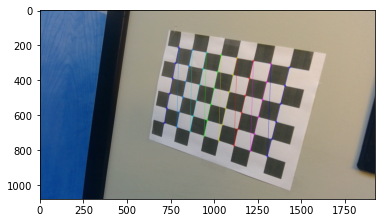

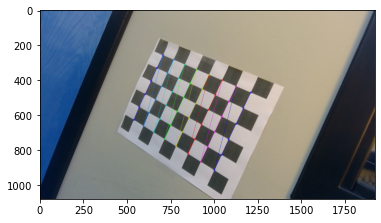

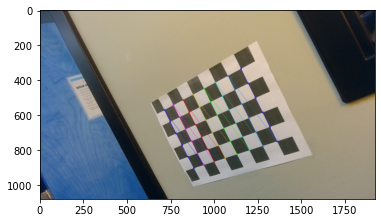

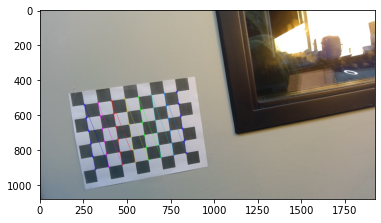

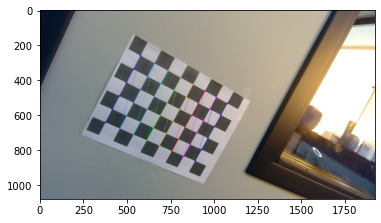

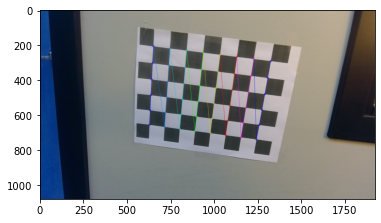

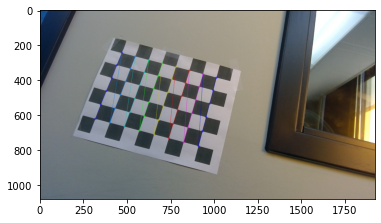

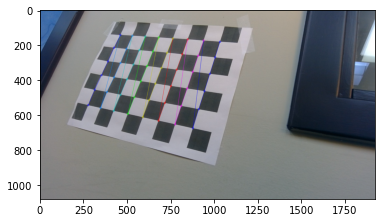

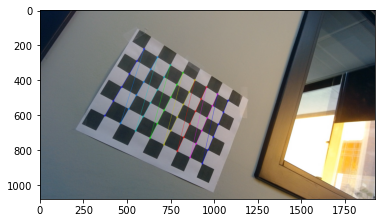

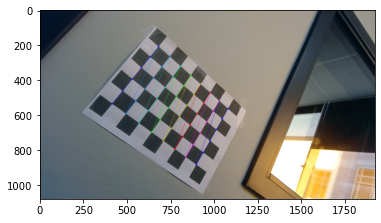

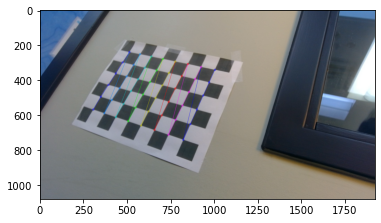

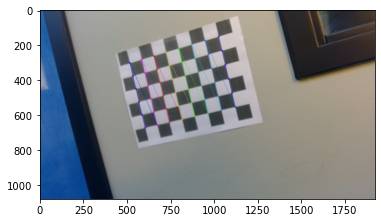

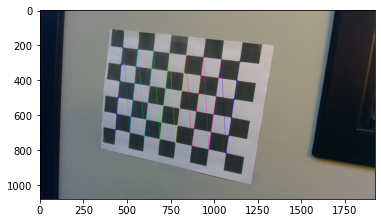

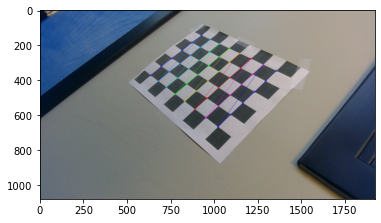

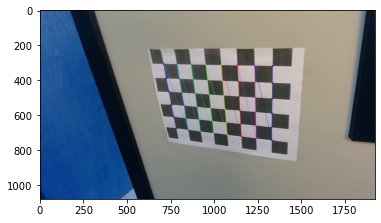

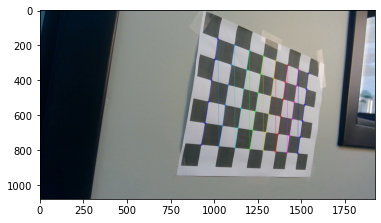

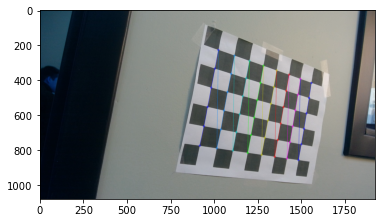

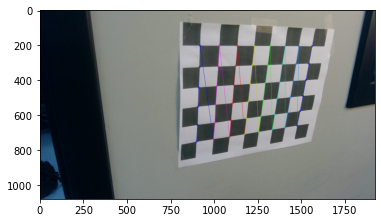

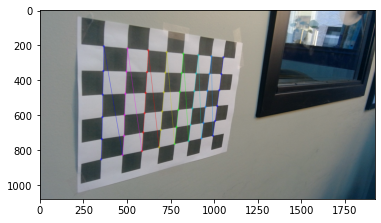

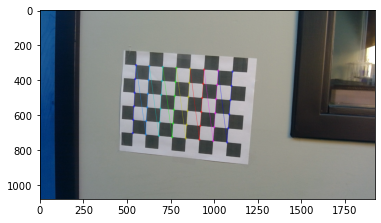

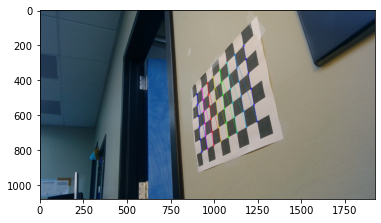

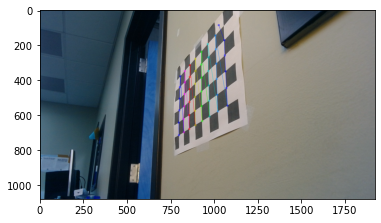

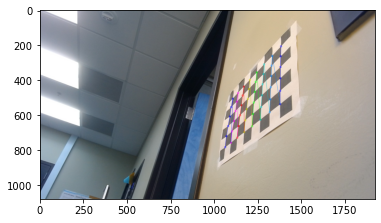

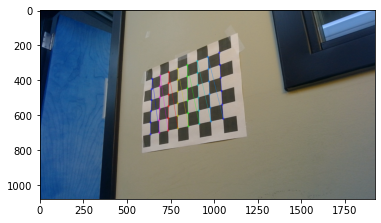

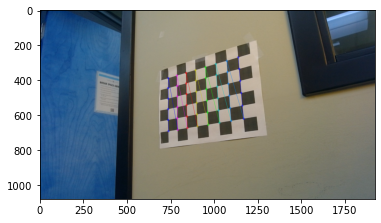

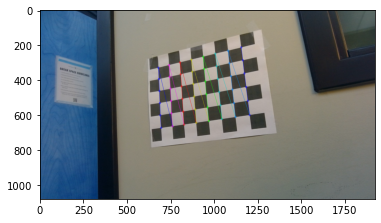

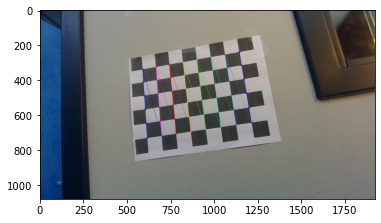

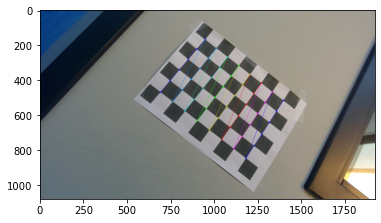

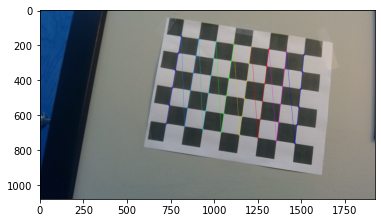

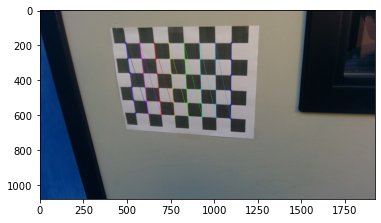

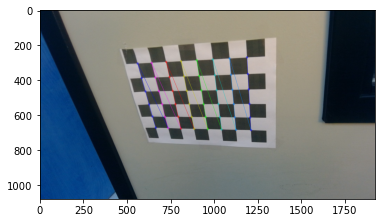

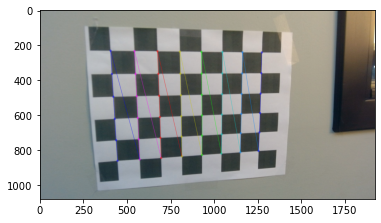

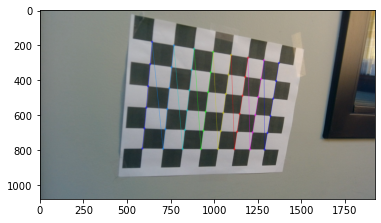

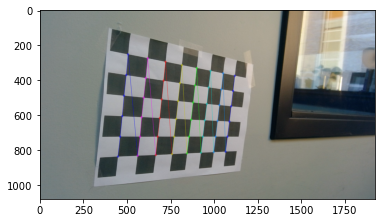

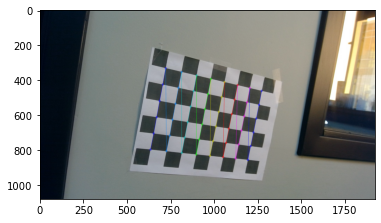

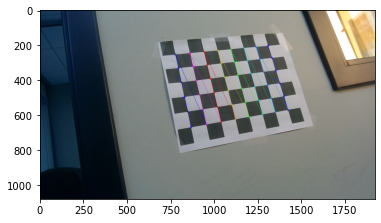

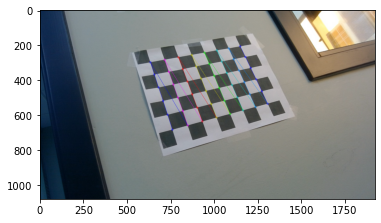

In [4]:
CHECKERBOARD = (6, 8)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = []

# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0, :, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

# Extracting path of individual image stored in a given directory
images = glob.glob('./Front_Camera/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH +
                                             cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
        plt.imshow(img)
        plt.show()
        
h, w = img.shape[:2]

In [4]:
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# print("Camera matrix : \n") 
# print(mtx)
# print("distortion coefficients : \n")
# print(dist)
# np.save('Back_Camera_mtx',mtx)
# np.save('Back_Camera_dist', dist)


Camera matrix : 

[[1.39387161e+03 0.00000000e+00 9.40051015e+02]
 [0.00000000e+00 1.39494465e+03 5.57531856e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients : 

[[ 0.0263531  -0.16565056  0.00036394 -0.00632488  0.10119697]]


In [5]:
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# print("Camera matrix : \n") 
# print(mtx)
# print("distortion coefficients : \n")
# print(dist)
# np.save('Front_Camera_mtx',mtx)
# np.save('Front_Camera_dist', dist)

Camera matrix : 

[[1.39387161e+03 0.00000000e+00 9.40051015e+02]
 [0.00000000e+00 1.39494465e+03 5.57531856e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
distortion coefficients : 

[[ 0.0263531  -0.16565056  0.00036394 -0.00632488  0.10119697]]


### Other Techniques (Archive)

In [5]:
test_img = cv2.imread('./Images/Instructions_Front.png')
img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [6]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks_GTX.dat')

File exists
Faces:
 [[289  63  79  79]]


Text(0.5, 1.0, 'Face Detection')

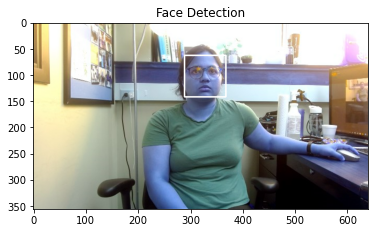

In [9]:
haarcascade = "haarcascade_frontalface_alt2.xml"

# chech if file is in working directory
if (haarcascade in os.listdir(os.curdir)):
    print("File exists")

# create an instance of the Face Detection Cascade Classifier
detector = cv2.CascadeClassifier(haarcascade)

# Detect faces using the haarcascade classifier on the "grayscale image"
faces = detector.detectMultiScale(gray)

# Print coordinates of detected faces
print("Faces:\n", faces)

for face in faces:
#     save the coordinates in x, y, w, d variables
    (x,y,w,d) = face
    # Draw a white coloured rectangle around each face using the face's coordinates
    # on the "image_template" with the thickness of 2 
    cv2.rectangle(test_img,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.imshow(test_img)
plt.title('Face Detection')

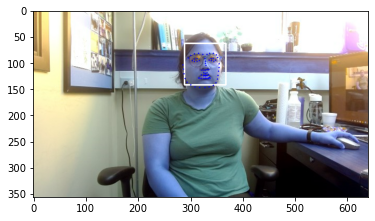

In [12]:
# Detect landmarks on "image_gray"
landmark_detector  = cv2.face.createFacemarkLBF()
landmark_detector.loadModel("lbfmodel.yaml")

_, landmarks = landmark_detector.fit(gray,faces)

for landmark in landmarks:
    for x,y in landmark[0]:
#display landmarks on "image_cropped"
#with white colour in BGR and thickness 1
        cv2.circle(test_img, (x.astype(int), y.astype(int)), 1, (0, 0, 255), -1)
plt.imshow(test_img)

In [13]:
new_lm = []
for landmark in landmarks:
    for i in landmark:
        for j in i:
            new_lm.append(j)

(68, 2)


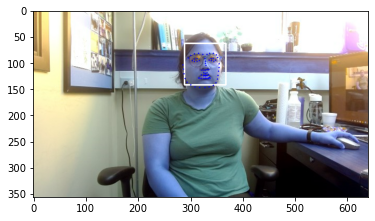

In [18]:
new_lm = np.array(new_lm)
print(new_lm.shape)
#new_shape = np.array([new_lm[33,:],new_lm[8,:], new_lm[36,:], new_lm[39,:], new_lm[42,:], new_lm[45,:], new_lm[48,:], new_lm[54,:], new_lm[17,:],new_lm[21,:],new_lm[22,:],new_lm[26,:]])
new_shape = np.array([new_lm[33,:],new_lm[8,:], new_lm[36,:], new_lm[45,:],new_lm[48,:], new_lm[54,:]])

for x,y in new_shape:
# display landmarks on "image_cropped"
# with white colour in BGR and thickness 1
        cv2.circle(test_img, (x.astype(int), y.astype(int)), 1, (0, 0, 255), -1)
plt.imshow(test_img)

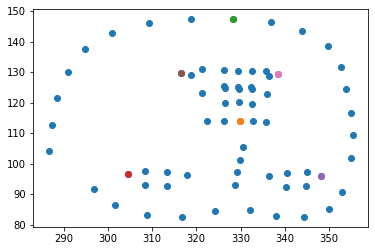

In [19]:
plt.scatter(new_lm[:,0],new_lm[:,1])
plt.scatter(new_lm[33,0], new_lm[33,1])
plt.scatter(new_lm[8,0], new_lm[8,1])
plt.scatter(new_lm[36,0], new_lm[36,1])
# plt.scatter(new_lm[39,0], new_lm[39,1]) 
#plt.scatter(new_lm[42,0], new_lm[42,1])
plt.scatter(new_lm[45,0], new_lm[45,1])
plt.scatter(new_lm[48,0], new_lm[48,1]) #left
plt.scatter(new_lm[54,0], new_lm[54,1]) #right
# plt.scatter(new_lm[17,0], new_lm[17,1]) #left
# plt.scatter(new_lm[21,0], new_lm[21,1]) #left
# plt.scatter(new_lm[22,0], new_lm[22,1]) #left
# plt.scatter(new_lm[26,0], new_lm[26,1]) #left






In [21]:
 new_shape = new_shape.astype(np.float32)

In [22]:
new_shape

array([[329.8508  , 114.08867 ],
       [328.3309  , 147.26738 ],
       [304.52484 ,  96.731766],
       [348.19556 ,  95.89623 ],
       [316.4882  , 129.88087 ],
       [338.37598 , 129.54933 ]], dtype=float32)

In [26]:
# WorldCoord_face = np.array([[0.0, 0.0, 0.0], [0.0,-0.73795,-0.28705], [-0.4472,0.321149,-0.44201], [0.447198,0.321149,-0.44201], [-0.27246,-0.34724,-0.32928], [0.272456,-0.34724,-0.32928]])
# #WorldCoord_face = np.array([[0.0, 0.0, 0.0], [0.0,-0.73795,-0.28705], [-0.4472,0.321149,-0.44201],[0.447198,0.321149,-0.44201]])
# #WorldCoord_face =  np.array([[0.0, 0.0, 0.0],[-0.4472,0.321149,-0.44201],[0.447198,0.321149,-0.44201]])
WorldCoord_face = np.array( [[0.0, 0.0, 0.0],
                              [0.0, -330.0, -65.0],  #Chin
                              [-225.0, 170.0, -135.0],#Left eye corner
                              [225.0, 170.0, -135.0], #Right eye corner 
                              [-150.0, -150.0, -125.0],#Left mouth 
                              [150.0, -150.0, -125.0]]) #Right mouth )

In [27]:
mtx = np.load('Front_Camera_mtx.npy')
print(mtx)
dist = np.load('Front_Camera_dist.npy')
print(dist)


[[1.39387161e+03 0.00000000e+00 9.40051015e+02]
 [0.00000000e+00 1.39494465e+03 5.57531856e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.0263531  -0.16565056  0.00036394 -0.00632488  0.10119697]]


In [28]:
dist_coeffs = np.zeros((4,1))
dist_coeffs

array([[0.],
       [0.],
       [0.],
       [0.]])

In [29]:
#Try Ransac PnP and PnP
boo,rvec, tvec,_ = cv2.solvePnPRansac(WorldCoord_face, new_shape, mtx, dist)
print(boo)

True


In [31]:
nose_end_point2D, jacobian = cv2.projectPoints(np.array([(0.0, 0.0, 1000.0)]), rvec, tvec, mtx, dist)

In [32]:
test_img = cv2.imread('./Images/Instructions_Front.png')
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

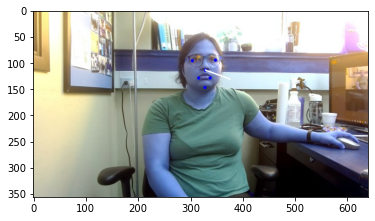

In [33]:
for p in new_shape:
    cv2.circle(test_img, (int(p[0]), int(p[1])), 3, (0,0,255), -1)
    
    point1 = ( int(new_shape[0][0]), int(new_shape[0][1]))
    point2 = ( int(nose_end_point2D[0][0][0]), int(nose_end_point2D[0][0][1]))
    
cv2.line(test_img, point1, point2, (255,255,255), 2)

plt.imshow(test_img)